In [28]:
path = r"Y:\3_Research_研究\拖曳水槽實驗\TS\2020_07_07_TS\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [29]:
filelist = glob(path)

In [30]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [31]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.values = self.values-np.mean(self.values)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=0
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [32]:
filelist

['Y:\\3_Research_研究\\拖曳水槽實驗\\TS\\2020_07_07_TS\\1721_AI0_chirp_without_target.wav',
 'Y:\\3_Research_研究\\拖曳水槽實驗\\TS\\2020_07_07_TS\\1735_AI0_chirp_with_target.wav']

In [33]:
tank = SL(filelist[0])
tank.readWavFileToArray()
# tank.plot()

title: AI0_chirp
total lenght: 58825000, time duration: 574


In [34]:
tank.findPeakIndex(0.25)
# tank.plotWithPeak()
# b.calculateSL()

total sound generated: 189


In [35]:
index_tank = tank.getIndex()
len(index_tank)/1

189.0

In [36]:
data_tank = tank.getData()

In [37]:
target = SL(filelist[1])
target.readWavFileToArray()
# target.plot()

title: AI0_chirp
total lenght: 89300000, time duration: 872


In [38]:
target.findPeakIndex(0.25)
# target.plotWithPeak()
# b.calculateSL()

total sound generated: 287


In [39]:
index_target = target.getIndex()
data_target = target.getData()

In [53]:
fs = 102400
start_tank = int(index_tank[0]-0.0005*fs)
end_tank = int(start_tank + fs*0.001)
start_target = int(index_target[0]-0.0005*fs)
end_target = int(start_target + fs*0.001)

template = data_tank[start_tank:end_tank]
single_tank = data_tank[start_tank:end_tank]
single_target = data_target[start_target:end_target]

for i in range(1, 100):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    
    
    tank = data_tank[start_tank:end_tank]
    
    template = template + tank

<IPython.core.display.Javascript object>


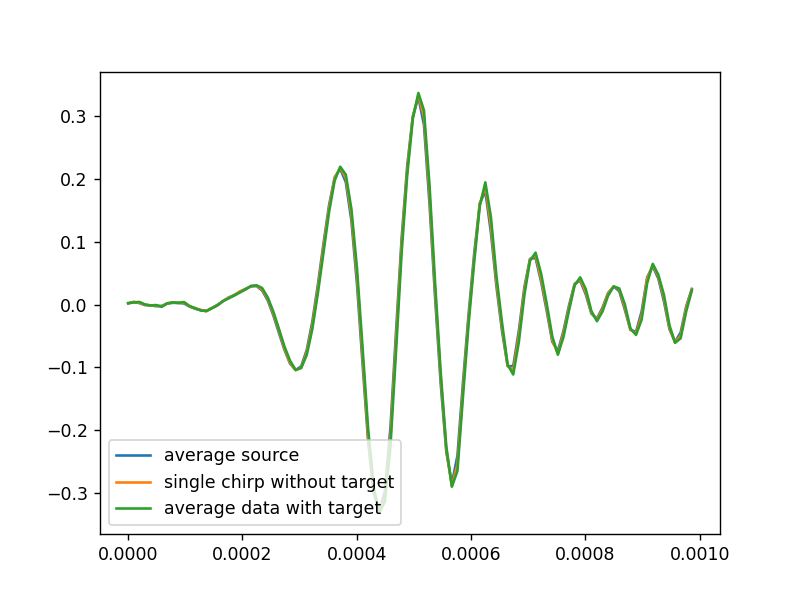

In [54]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(template))/fs

ax.plot(time, template/100, label="average source")
ax.plot(time, single_tank, label="single chirp without target")
ax.plot(time, single_target, label="average data with target")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

In [55]:
fs = 102400
start_tank = int(index_tank[0]-0.001*fs)
end_tank = int(start_tank + fs*0.01)
# start_tank = int(index_tank[0]-0.001*fs)
# end_tank = int(start_tank + fs*0.004)

received_signal_tank = data_tank[start_tank:end_tank]

<IPython.core.display.Javascript object>


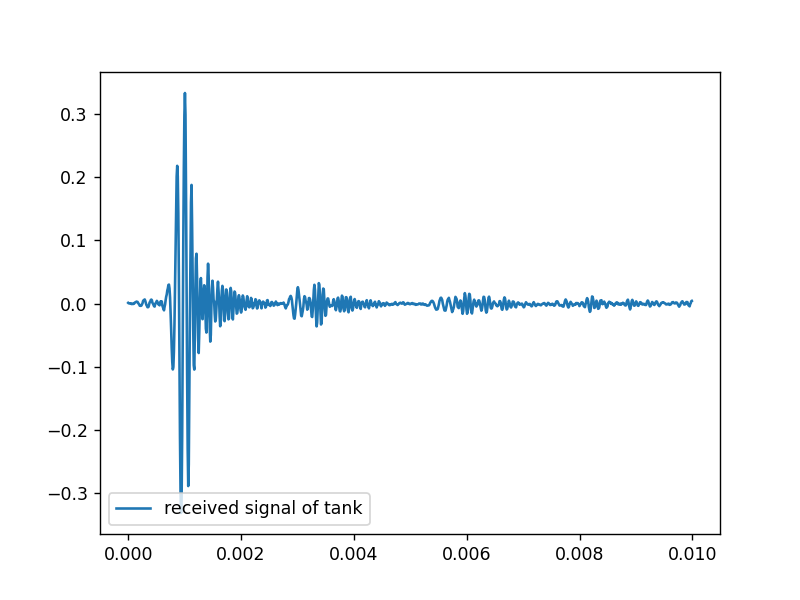

In [56]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(received_signal_tank))/fs

ax.plot(time, received_signal_tank, label="received signal of tank")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

<IPython.core.display.Javascript object>


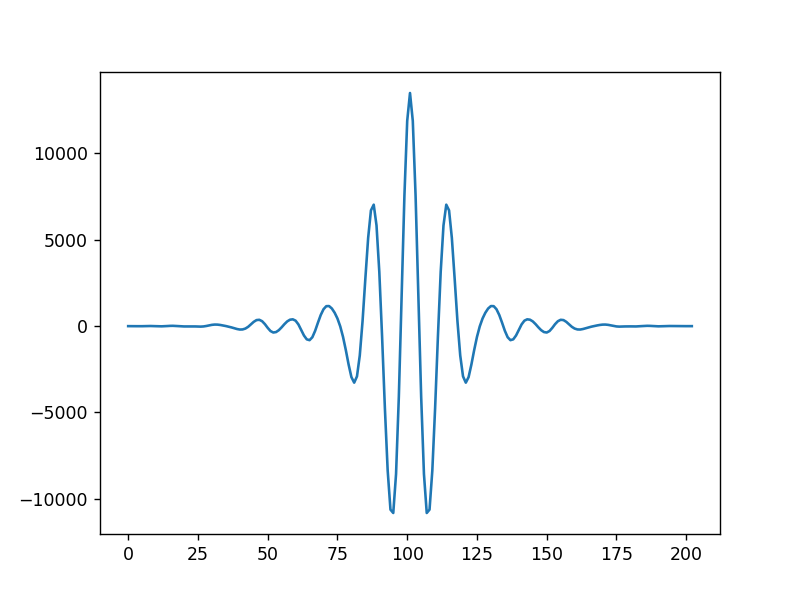

In [57]:
fir_coeff = template[::-1]
auto_correlation = np.correlate(template, template, "full")
fig, ax = plt.subplots()
ax.plot(auto_correlation)

<IPython.core.display.Javascript object>


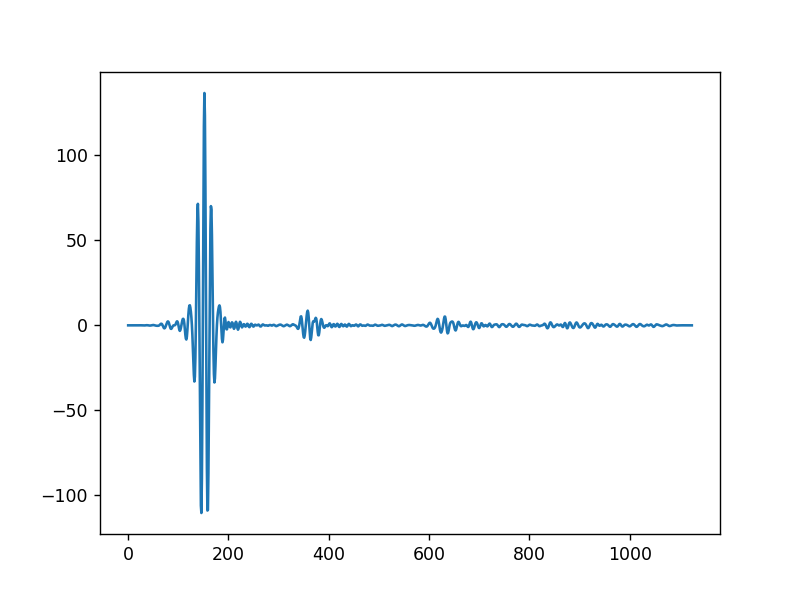

In [58]:
det_tank = np.convolve(fir_coeff, received_signal_tank, "full")
fig, ax = plt.subplots()
ax.plot(det_tank)

<IPython.core.display.Javascript object>


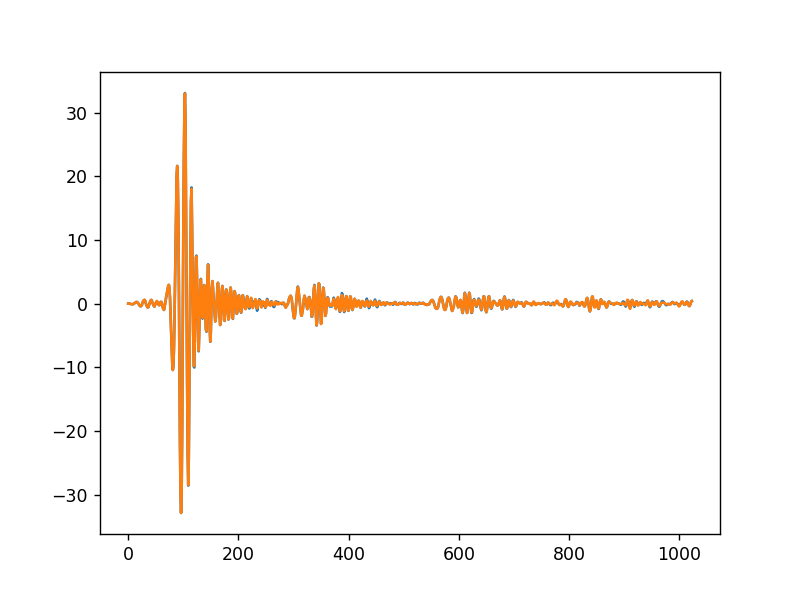

In [59]:
fs = 102400
start_target = int(index_target[0]-0.001*fs)
end_target = int(start_target + fs*0.01)
start_tank = int(index_tank[0]-0.001*fs)
end_tank = int(start_tank + fs*0.01)

received_signal_target = data_target[start_target:end_target]
received_signal_tank = data_tank[start_tank:end_tank]
for i in range(1, 100):
    start_target = int(index_target[i]-0.001*fs)
    end_target = int(start_target + fs*0.01)
    start_tank = int(index_tank[i]-0.001*fs)
    end_tank = int(start_tank + fs*0.01)
    
    target = data_target[start_target:end_target]
    tank = data_tank[start_tank:end_tank]
    
    received_signal_target = received_signal_target + target
    received_signal_tank = received_signal_tank + tank
    
fig, ax = plt.subplots()
ax.plot(received_signal_target)
ax.plot(received_signal_tank)

<IPython.core.display.Javascript object>


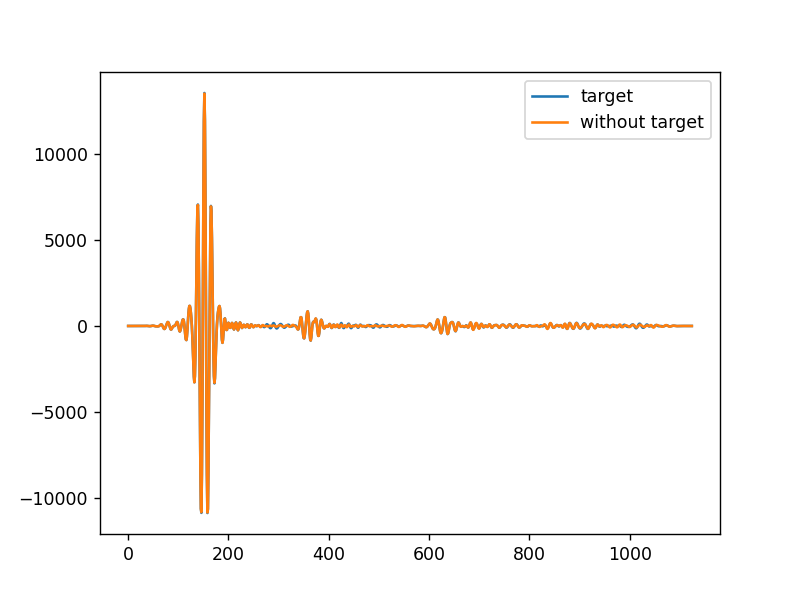

In [60]:
fir_coeff = template[::-1]
det_target = np.convolve(fir_coeff, received_signal_target, "full")
det_tank = np.convolve(fir_coeff, received_signal_tank, "full")
target_power = np.convolve(np.ones(len(fir_coeff)), received_signal_target*received_signal_target, "full")
tank_power = np.convolve(np.ones(len(fir_coeff)), received_signal_tank*received_signal_tank, "full")

fig, ax = plt.subplots()
ax.plot(det_target, label="target")
ax.plot(det_tank, label="without target")
ax.legend()

<IPython.core.display.Javascript object>


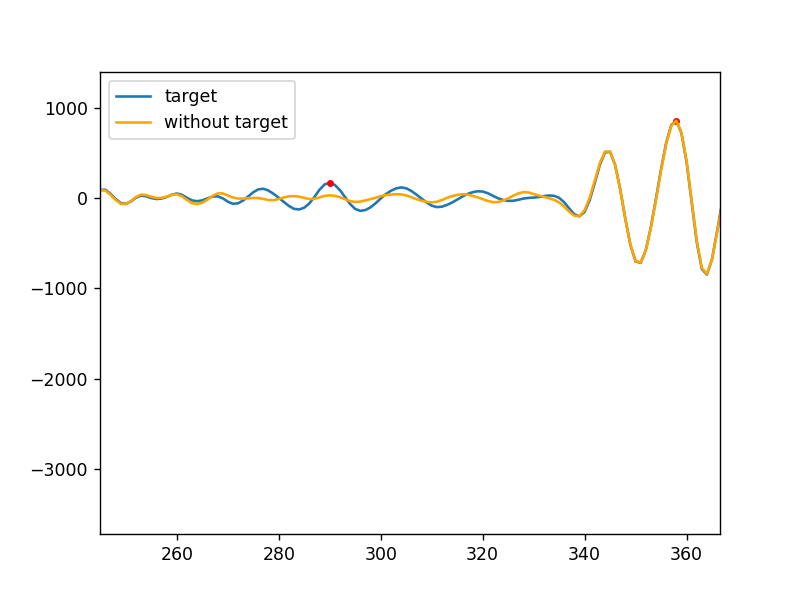

In [61]:
sig_1 = det_target[:240]
sig_2 = det_target[240:310]
sig_3 = det_target[310:380]
arg_1 = np.argmax(sig_1)
arg_2 = np.argmax(sig_2)+240
arg_3 = np.argmax(sig_3)+310

fig, ax = plt.subplots()
ax.plot(det_target, label="target")
ax.plot(arg_2, det_target[arg_2],'r.')
ax.plot(arg_1, det_target[arg_1],'r.')
ax.plot(arg_3, det_target[arg_3],'r.')
ax.plot(det_tank, label="without target", color="orange")
ax.legend()

In [52]:
len(fir_coeff)

71

<IPython.core.display.Javascript object>


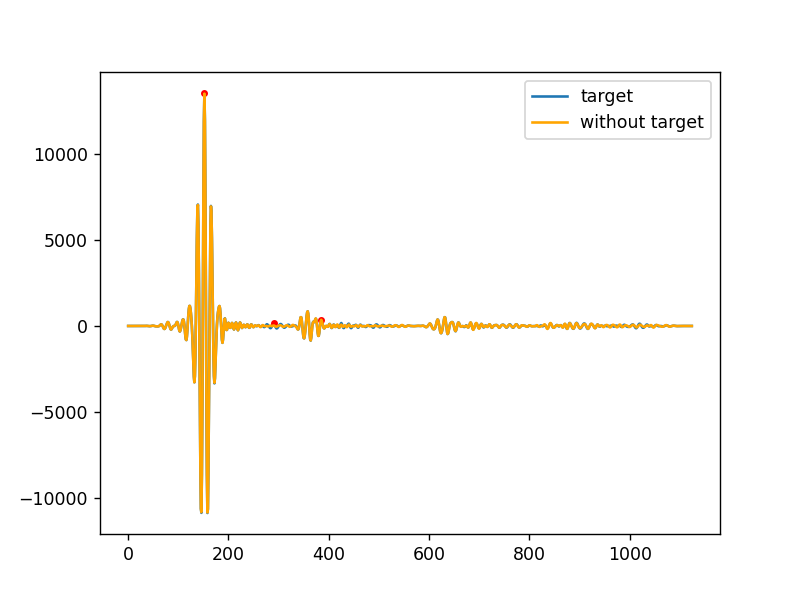

In [62]:
sig_1 = det_target[132:172]
sig_2 = det_target[268:308]
sig_3 = det_target[380:450]
arg_1 = np.argmax(sig_1)+132
arg_2 = np.argmax(sig_2)+268
arg_3 = np.argmax(sig_3)+380


fig, ax = plt.subplots()
ax.plot(det_target, label="target")
ax.plot(arg_2, det_target[arg_2],'r.')
ax.plot(arg_1, det_target[arg_1],'r.')
ax.plot(arg_3, det_target[arg_3],'r.')
ax.plot(det_tank, label="without target", color="orange")
ax.legend()

In [63]:
(arg_2-arg_1)/102400

0.00134765625

In [55]:
2/1500

0.0013333333333333333

In [28]:
diff_point = arg_2-arg_1
diff_point

138

<IPython.core.display.Javascript object>


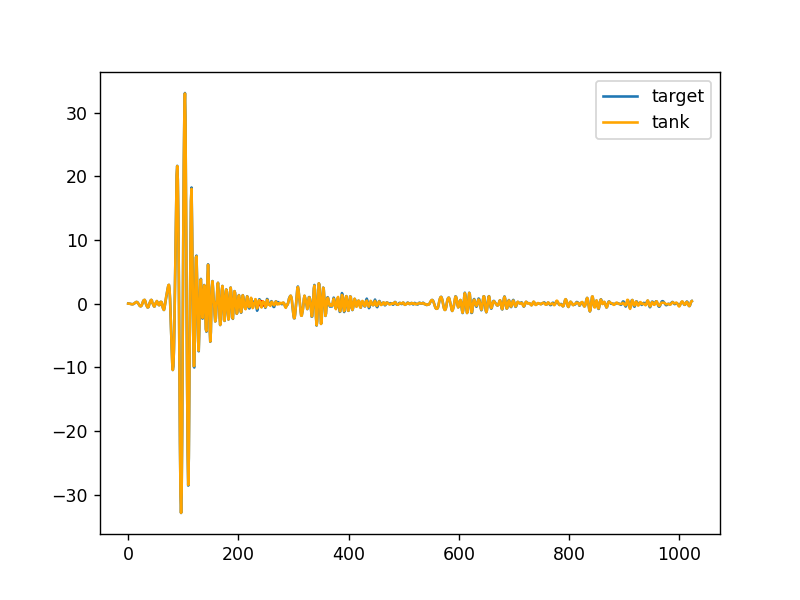

In [56]:
start_target = int(index_target[0]-0.001*fs)

fig, ax = plt.subplots()
ax.plot(received_signal_target, label="target")
point_target = index_target[0]+diff_point-start_target
ax.plot(point_target, received_signal_target[point_target], 'r.')
ax.plot(received_signal_tank, label="tank", color="orange")
ax.legend()

In [33]:
point_target

-30760652

In [34]:
start_target

31069599

In [ ]:
len(received_signal_target)

In [ ]:
start_target

In [58]:
import math
min_power = 10**10
window_total_length = len(template)
delay = diff_point
power_list = []
for i in range(1, 11):
    alpha = i/math.pow(10, 1)
    assumpt_signal_1 = alpha*template
    diff = received_signal_target[delay:delay+window_total_length] - assumpt_signal_1
    power_diff = np.sum(diff*diff)
    power_list.append(power_diff)
    if(power_diff < min_power):
        number = i
        min_power = power_diff
k_pre = number/10

for p in range(5):
    min_power = 10**10
    for i in range(-5, 6):
        k = i/math.pow(10, p+2)
        alpha = k_pre+k
        assumpt_signal_1 = alpha*template
        diff = received_signal_target[delay:delay+window_total_length] - assumpt_signal_1
        
        power_diff = np.sum(diff*diff)
        power_list.append(power_diff)
        if(power_diff < min_power):
            number = i
            min_power = power_diff
    k_pre = k_pre + number/math.pow(10,p+2)
k_pre

0.044445000000000005